### Problem statement
Regression: Simple Linear

Dataset : diabetes.csv

Apply Data pre-processing (Label Encoding , Data Transformation....)
techniques if necessary.
Use any one feature of the dataset to train and test the regression model. Also
calculate coefficients, residual sum of squares and the coefficient of determination

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('../../all_datasets/Regression/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Independant features and dependant features
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [52]:
print(f'shape of x is: {x.shape}')
print(f'shape of y is: {y.shape}')

shape of x is: (768, 8)
shape of y is: (768,)


ValueError: x and y must be the same size

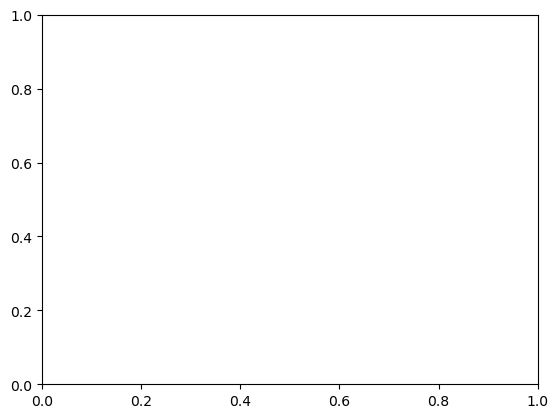

In [48]:
plt.scatter(x, y, marker='x', c='r')

### Train test split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [57]:
x_train

537

### Implementing linear regression

- For using gradient descent we need to standardize the data.
- Never standardize the output feature.
- fit_transform() is used on the training data to learn the scaling or transformation parameters and then applies the same transformation to the training data. transform() is used on new data (e.g. test data) to apply the same transformation that was learned on the training data.

In [10]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
# to inverse the above values
# scaler.inverse_transform()

In [15]:
x_test = scaler.transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression


In [23]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
mse = cross_val_score(reg, x_train, y_train, scoring='neg_mean_squared_error', cv=5) # do cross validation 5 times


In [26]:
np.mean(mse)

-0.16019085062025318

In [27]:
## Prediction
reg_predict = reg.predict(x_test)

- To check wheter these predicted values are accurate or not compare it with y_test

In [43]:
import seaborn as sns

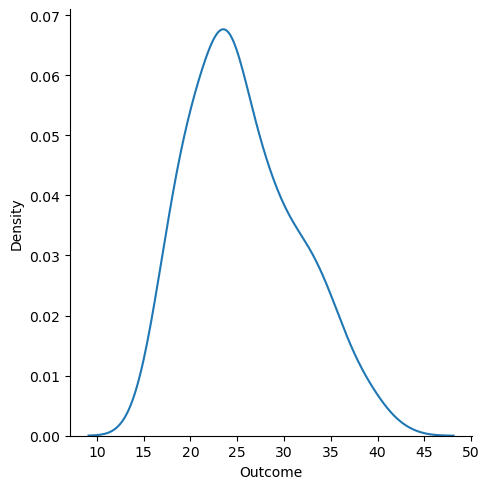

In [44]:
sns.displot(reg_predict-y_test, kind='kde')

In [45]:
from sklearn.metrics import r2_score

In [47]:
score = r2_score(reg_predict, y_test)
score

-18.052742163259268